In [6]:
import pandas as pd
df=pd.read_csv("C:/Users/Admin/Desktop/DYPIEMR data/DSBDA lab/wrangled_data.csv")

In [7]:
df

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-L/100km,price,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,8.703704,13495,Low,0,1,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,8.703704,16500,Low,0,1,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,19,9.038462,16500,Medium,0,1,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,24,7.833333,13950,Low,0,1,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,18,10.681818,17450,Low,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,...,114,5400.0,23,8.392857,16845,Low,0,1,1,0
197,197,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,...,160,5300.0,19,9.400000,19045,Medium,0,1,0,1
198,198,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,...,134,5500.0,18,10.217391,21485,Medium,0,1,1,0
199,199,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,...,106,4800.0,26,8.703704,22470,Low,1,0,0,1


In [8]:
df.skew(axis=0)

C:\Users\Admin\AppData\Local\Temp/ipykernel_4996/3038578967.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis=0)


Unnamed: 0           0.000000
symboling            0.197370
normalized-losses    0.846546
wheel-base           1.031261
length               0.154446
width                0.875029
height               0.029173
curb-weight          0.705804
engine-size          1.979144
bore                -0.032730
stroke              -0.700396
compression-ratio    2.584462
horsepower           1.146729
peak-rpm             0.107770
city-mpg             0.680433
highway-L/100km      0.849662
price                1.809675
diesel               2.696072
gas                 -2.696072
aspiration-std      -1.686384
aspiration-turbo     1.686384
dtype: float64

In [10]:
#Right Skewed log transformation
import numpy as np
np.log(1.68)

0.5187937934151675

In [11]:

log_aspiration_turbo=np.log(df['aspiration-turbo'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
log_aspiration_turbo.head()

0   -inf
1   -inf
2   -inf
3   -inf
4   -inf
Name: aspiration-turbo, dtype: float64

In [13]:
log_aspiration_turbo.skew()

nan

In [14]:
#Original skewed value
df['compression-ratio'].skew()

2.5844624326120726

In [15]:
#root transformation
r_compression_ratio=np.sqrt(df['compression-ratio'])
r_compression_ratio.head()

0    3.000000
1    3.000000
2    3.000000
3    3.162278
4    2.828427
Name: compression-ratio, dtype: float64

In [16]:
r_compression_ratio.skew()

2.4866297804171253

In [17]:
# cube root transformtion x=x^1/3
cube_compression_ratio=np.cbrt(df['compression-ratio'])
cube_compression_ratio.head(5)

0    2.080084
1    2.080084
2    2.080084
3    2.154435
4    2.000000
Name: compression-ratio, dtype: float64

In [18]:
cube_compression_ratio.skew()

2.4442345326042383

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='compression-ratio', ylabel='Density'>

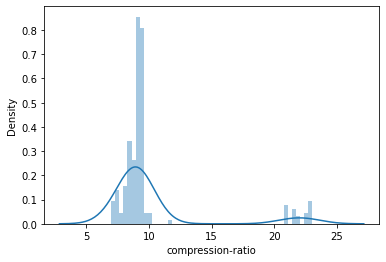

In [19]:
import seaborn as sn
sn.distplot(df["compression-ratio"])

In [20]:
#Reciprocals transformation x=1/x
reci_compression_ratio=np.reciprocal(df['compression-ratio'])
reci_compression_ratio.head(5)

0    0.111111
1    0.111111
2    0.111111
3    0.100000
4    0.125000
Name: compression-ratio, dtype: float64

In [21]:
reci_compression_ratio.skew()

-1.8527998600619238

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='compression-ratio', ylabel='Density'>

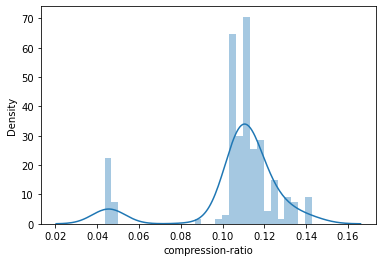

In [22]:
import seaborn as sn
sn.distplot(reci_compression_ratio)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='city-mpg', ylabel='Density'>

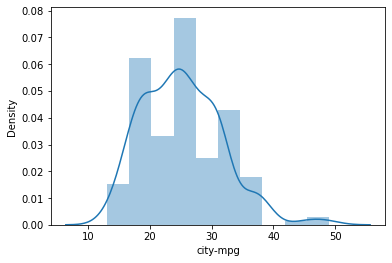

In [23]:
sn.distplot(df["city-mpg"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='stroke', ylabel='Density'>

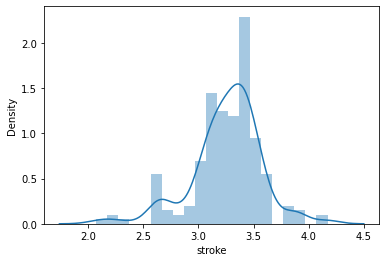

In [24]:
sn.distplot(df["stroke"])

In [25]:
#original skewed value
df["stroke"].skew()

-0.7003960288079346

In [26]:
#Square transformation x to x^2
square_stroke=np.square(df['stroke'])
square_stroke.head(5)

0     7.1824
1     7.1824
2    12.0409
3    11.5600
4    11.5600
Name: stroke, dtype: float64

In [27]:
square_stroke.skew()

-0.16456734811645615

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='stroke', ylabel='Density'>

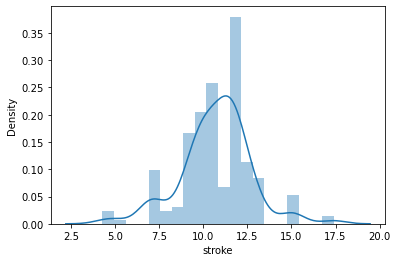

In [28]:
sn.distplot(square_stroke)

In [29]:
#cubes transformation x to x^3
cubes_stroke=np.power(df['stroke'],3)
cubes_stroke.head(5)

0    19.248832
1    19.248832
2    41.781923
3    39.304000
4    39.304000
Name: stroke, dtype: float64

In [30]:
cubes_stroke.skew()

0.3586197086362063

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='stroke', ylabel='Density'>

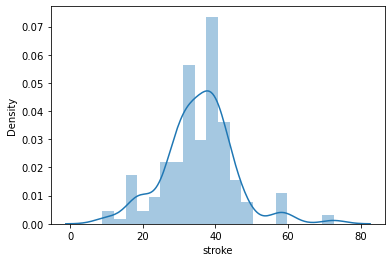

In [31]:
sn.distplot(cubes_stroke)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='length', ylabel='Density'>

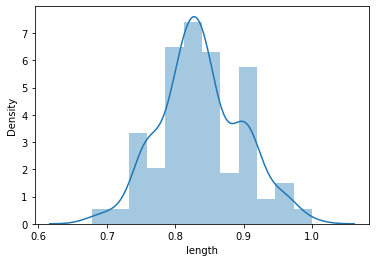

In [32]:
sn.distplot(df["length"])

# Convert distribution to Normal Distribution

In [33]:
df.skew()

C:\Users\Admin\AppData\Local\Temp/ipykernel_4996/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Unnamed: 0           0.000000
symboling            0.197370
normalized-losses    0.846546
wheel-base           1.031261
length               0.154446
width                0.875029
height               0.029173
curb-weight          0.705804
engine-size          1.979144
bore                -0.032730
stroke              -0.700396
compression-ratio    2.584462
horsepower           1.146729
peak-rpm             0.107770
city-mpg             0.680433
highway-L/100km      0.849662
price                1.809675
diesel               2.696072
gas                 -2.696072
aspiration-std      -1.686384
aspiration-turbo     1.686384
dtype: float64

<AxesSubplot:>

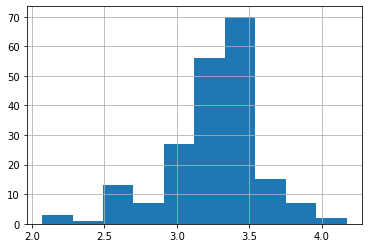

In [34]:
#by using histogram
df.stroke.hist()

In [ ]:
#Moderately negatively Skewed i.e does not follow a normal distribution

array([[<AxesSubplot:title={'center':'compression-ratio'}>]], dtype=object)

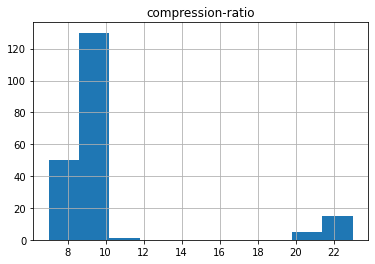

In [35]:
df.hist('compression-ratio')

In [ ]:
#Highly positive Skewed i.e does not follow a normal distribution

array([[<AxesSubplot:title={'center':'length'}>]], dtype=object)

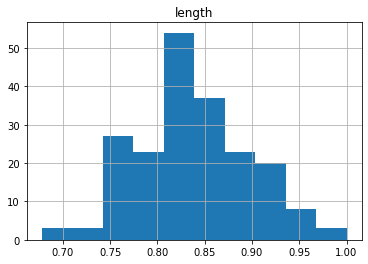

In [36]:
df.hist('length')

In [ ]:
#Symmetric i.e does follow a normal distribution

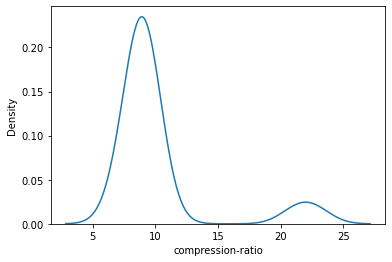

In [37]:
import seaborn as sns
sns.kdeplot(df['compression-ratio']);

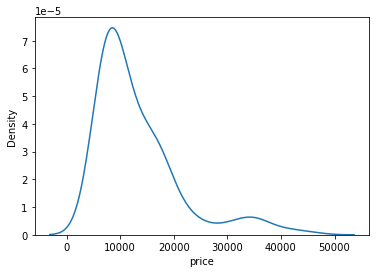

In [38]:
sns.kdeplot(df['price']);#highly positively skewed

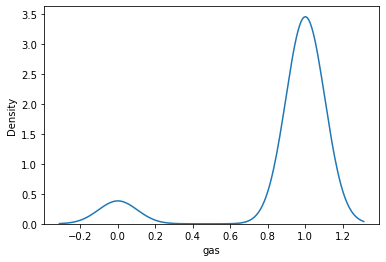

In [39]:
sns.kdeplot(df['gas']);#highly Negatively skewed


# distribution of variables using a Q-Q plot

In [40]:
import scipy.stats as stats
import pylab

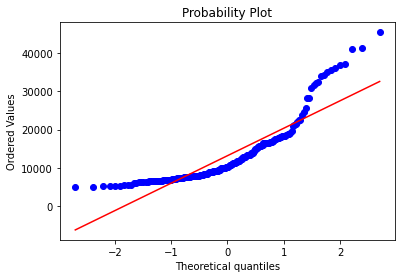

In [60]:
stats.probplot(df.price,plot=pylab);#not normal distribution

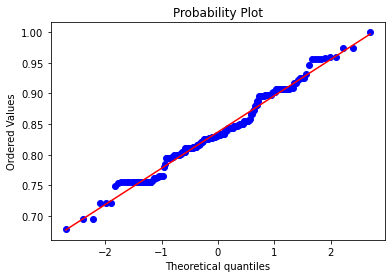

In [42]:
stats.probplot(df.length,plot=pylab);#normal distribution

In [ ]:
# Performing the transformations on the Price variable.

In [43]:
df['price_log']=np.log(df['price'])

In [45]:
df['price_log']

0       9.510075
1       9.711116
2       9.711116
3       9.543235
4       9.767095
         ...    
196     9.731809
197     9.854560
198     9.975110
199    10.019936
200    10.026811
Name: price_log, Length: 201, dtype: float64

((array([-2.70235077, -2.39300644, -2.21670641, -2.09047253, -1.99075721,
         -1.90762425, -1.83590295, -1.77254445, -1.71559368, -1.66371874,
         -1.61596971, -1.57164427, -1.53020786, -1.49124379, -1.45442067,
         -1.41947039, -1.38617282, -1.35434495, -1.32383285, -1.29450578,
         -1.26625169, -1.2389738 , -1.21258791, -1.18702027, -1.1622059 ,
         -1.13808725, -1.11461308, -1.09173755, -1.06941949, -1.04762177,
         -1.02631079, -1.005456  , -0.98502958, -0.96500611, -0.94536226,
         -0.92607659, -0.90712937, -0.88850233, -0.87017859, -0.85214246,
         -0.83437937, -0.81687572, -0.79961884, -0.78259687, -0.76579869,
         -0.74921388, -0.73283263, -0.71664571, -0.70064443, -0.68482057,
         -0.66916635, -0.65367443, -0.63833783, -0.62314992, -0.60810442,
         -0.59319534, -0.57841696, -0.56376385, -0.5492308 , -0.53481284,
         -0.52050522, -0.50630336, -0.49220289, -0.47819962, -0.4642895 ,
         -0.45046865, -0.43673331, -0.

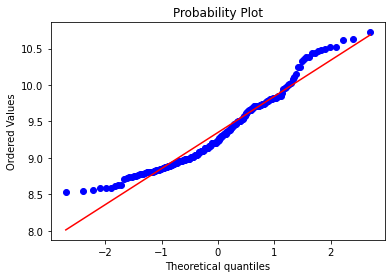

In [46]:
stats.probplot(df['price_log'],plot=pylab)

In [47]:
df['price_reciprocal']=1/df.price

((array([-2.70235077, -2.39300644, -2.21670641, -2.09047253, -1.99075721,
         -1.90762425, -1.83590295, -1.77254445, -1.71559368, -1.66371874,
         -1.61596971, -1.57164427, -1.53020786, -1.49124379, -1.45442067,
         -1.41947039, -1.38617282, -1.35434495, -1.32383285, -1.29450578,
         -1.26625169, -1.2389738 , -1.21258791, -1.18702027, -1.1622059 ,
         -1.13808725, -1.11461308, -1.09173755, -1.06941949, -1.04762177,
         -1.02631079, -1.005456  , -0.98502958, -0.96500611, -0.94536226,
         -0.92607659, -0.90712937, -0.88850233, -0.87017859, -0.85214246,
         -0.83437937, -0.81687572, -0.79961884, -0.78259687, -0.76579869,
         -0.74921388, -0.73283263, -0.71664571, -0.70064443, -0.68482057,
         -0.66916635, -0.65367443, -0.63833783, -0.62314992, -0.60810442,
         -0.59319534, -0.57841696, -0.56376385, -0.5492308 , -0.53481284,
         -0.52050522, -0.50630336, -0.49220289, -0.47819962, -0.4642895 ,
         -0.45046865, -0.43673331, -0.

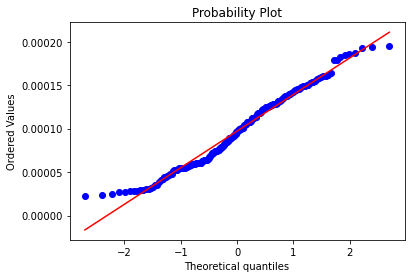

In [54]:
stats.probplot(df['price_reciprocal'],plot=pylab)

In [55]:
stats.probplot(df['price_reciprocal'],)

((array([-2.70235077, -2.39300644, -2.21670641, -2.09047253, -1.99075721,
         -1.90762425, -1.83590295, -1.77254445, -1.71559368, -1.66371874,
         -1.61596971, -1.57164427, -1.53020786, -1.49124379, -1.45442067,
         -1.41947039, -1.38617282, -1.35434495, -1.32383285, -1.29450578,
         -1.26625169, -1.2389738 , -1.21258791, -1.18702027, -1.1622059 ,
         -1.13808725, -1.11461308, -1.09173755, -1.06941949, -1.04762177,
         -1.02631079, -1.005456  , -0.98502958, -0.96500611, -0.94536226,
         -0.92607659, -0.90712937, -0.88850233, -0.87017859, -0.85214246,
         -0.83437937, -0.81687572, -0.79961884, -0.78259687, -0.76579869,
         -0.74921388, -0.73283263, -0.71664571, -0.70064443, -0.68482057,
         -0.66916635, -0.65367443, -0.63833783, -0.62314992, -0.60810442,
         -0.59319534, -0.57841696, -0.56376385, -0.5492308 , -0.53481284,
         -0.52050522, -0.50630336, -0.49220289, -0.47819962, -0.4642895 ,
         -0.45046865, -0.43673331, -0.